In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

First project: Compare 1880 baby names vs. 2014 baby names, by plotting the top ten baby names by gender for each year. 

In [2]:
#grab the 1880 and 2014 text files from where I stashed them
Location = r'C:\Users\Erin\BirthNamesData\yob1880.txt'
df = pd.read_csv(Location, names=['Names', 'Gender', 'Births'])
Location = Location.replace('1880', '2014')
df2 = pd.read_csv(Location, names=['Names', 'Gender', 'Births'])

In [3]:
df.info()
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 3 columns):
Names     2000 non-null object
Gender    2000 non-null object
Births    2000 non-null int64
dtypes: int64(1), object(2)
memory usage: 31.3+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33044 entries, 0 to 33043
Data columns (total 3 columns):
Names     33044 non-null object
Gender    33044 non-null object
Births    33044 non-null int64
dtypes: int64(1), object(2)
memory usage: 516.4+ KB


Note how much bigger the 2014 file is than the 1880 file. Considering the data source (a 100% sampling of names by year of people who applied for Social Security cards), this makes sense. For one thing, since the population of the US has been growing continuously since its founding, it stands to reason that there were more babies born in America in 2014 than in 1880 (the 2014 population was not quite 320 million according to a quick Google search, versus a 50 million population in 1880). There are other reasons why the 1880 dataset is small, which I hope to get into later. 

In [4]:
#Insert the years into each respective database. This will help keep the years straight when we merge. 
df.insert(0, "Year", 1880)
df2.insert(0, "Year", 2014)

In [5]:
df2.head()

,Year,Names,Gender,Births
0,2014,Emma,F,20799
1,2014,Olivia,F,19674
2,2014,Sophia,F,18490
3,2014,Isabella,F,16950
4,2014,Ava,F,15586


In [12]:
#Pull the top ten boys' and girls' names for each year, then combine them all into a new dataframe. 
old_babies = df.groupby("Gender")
new_babies = df2.groupby("Gender")

In [20]:
babies = [old_babies.head(10), new_babies.head(10)]
all_babies = pd.concat(babies, ignore_index = True)

In [21]:
all_babies

,Year,Names,Gender,Births
0,1880,Mary,F,7065
1,1880,Anna,F,2604
2,1880,Emma,F,2003
3,1880,Elizabeth,F,1939
4,1880,Minnie,F,1746
5,1880,Margaret,F,1578
6,1880,Ida,F,1472
7,1880,Alice,F,1414
8,1880,Bertha,F,1320
9,1880,Sarah,F,1288


In [35]:
#Create a new column to denote rank by year and gender
rank = [1,2,3,4,5,6,7,8,9,10]*4
all_babies['Rank']=rank
cols=['Year', 'Gender', 'Rank', 'Names', 'Births']
all_babies = all_babies[cols]
all_babies

,Year,Gender,Rank,Names,Births
0,1880,F,1,Mary,7065
1,1880,F,2,Anna,2604
2,1880,F,3,Emma,2003
3,1880,F,4,Elizabeth,1939
4,1880,F,5,Minnie,1746
5,1880,F,6,Margaret,1578
6,1880,F,7,Ida,1472
7,1880,F,8,Alice,1414
8,1880,F,9,Bertha,1320
9,1880,F,10,Sarah,1288


In [77]:
girls = all_babies.loc[all_babies['Gender']=='F']
boys = all_babies.loc[all_babies['Gender']=='M']
girls

,Year,Gender,Rank,Names,Births
0,1880,F,1,Mary,7065
1,1880,F,2,Anna,2604
2,1880,F,3,Emma,2003
3,1880,F,4,Elizabeth,1939
4,1880,F,5,Minnie,1746
5,1880,F,6,Margaret,1578
6,1880,F,7,Ida,1472
7,1880,F,8,Alice,1414
8,1880,F,9,Bertha,1320
9,1880,F,10,Sarah,1288


Here's what I want to do: make two multiple bar plots with Rank as the x-axis and Births as the y-axis. The two columns should be 1880 and 2014. The plots will be divvied up by Gender. 

In [78]:
girls=girls.groupby(['Rank', 'Year']).sum()
boys = boys.groupby(['Rank', 'Year']).sum()

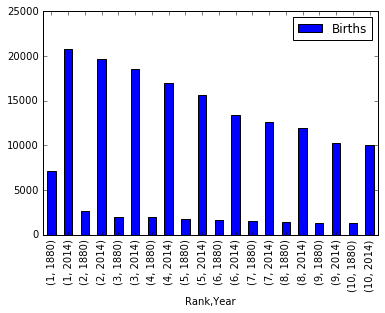

In [79]:
girls.plot.bar()

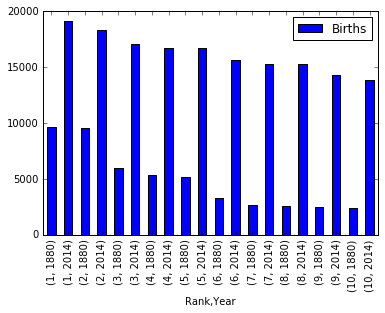

In [80]:
boys.plot.bar()

So there's a lot of possible leads for new things to explore: the popularity of the most popular names, any data discrepancies, especially in the early data (just looking at the top ten names, it could be that our data set has a lot more males than female), many other things. I'm going to leave this project off here, so new project soonish!